### context

This notebook is an image classification project that uses the Intel dataset of natural scenes around the world. The dataset contains around 25,000 images of size 150x150 pixels, which are categorized into six different classes: buildings, forest, glacier, mountain, sea, and street. The challenge of this project is to build a powerful neural network that can accurately classify the images into their respective categories. The dataset was initially published on datahack.analyticsvidhya.com by Intel to host an image classification challenge. The notebook aims to provide a practical example of building a convolutional neural network (CNN) for image classification using Keras and TensorFlow. The notebook includes data preprocessing steps, building and training a CNN model, and evaluating the model's accuracy on a test set.

### Libraries

#### Acessing folders

In the following part of the project, we will access each folder of the dataset and count the number of pictures for every class. This is an important step in any image classification project as it allows us to understand the distribution of the data and ensure that we have a balanced dataset. With this information, we can then proceed to prepare the data, build and train our deep learning model, and evaluate its performance on the test set. So let's get into it!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os
import cv2
import glob as gb

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Data reading

In [ ]:
trainpath = './Dataset/seg_train/'
testpath = './Dataset/seg_test/'

In [ ]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [ ]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


#### Converting to numbers

In this code snippet, we are loading the training images into memory and resizing them to a square shape of size s by s pixels, where s is a variable that we will define later on. We iterate over each folder in the 'seg_train' directory, then use the glob library to get a list of all JPEG files in the current folder. We then load each image using OpenCV, resize it to s by s pixels, and append it to the X_train list. Additionally, we append the corresponding class label (encoded as a numerical value) to the y_train list.

It's important to resize the images to a consistent size, as deep learning models require fixed input dimensions. Here, we have chosen s=150,as it was marked in the Git.

In [ ]:
s = 150

In [ ]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x   

In [ ]:
# Initialize empty lists to store the images and labels for the training set
X_train = []
y_train = []

# Loop through each folder in the training directory
for folder in os.listdir(trainpath + 'seg_train'):

    # Find all the image files in the folder using glob
    files = gb.glob(pathname=str(trainpath + 'seg_train//' + folder + '/*.jpg'))

    # Loop through each image file
    for file in files:
        
        # Read in the image using cv2
        image = cv2.imread(file)

        # Resize the image to the specified size (s,s) using cv2
        image_array = cv2.resize(image, (s,s))

        # Append the image to the X_train list as a nested list of pixel values
        X_train.append(list(image_array))

        # Append the corresponding label (numeric code) to the y_train list
        y_train.append(code[folder])

In [ ]:
len(X_train)

14034

Also for testing data ,we will be doing the same thing.

In [ ]:
# create empty lists to store images and labels
X_test = []
y_test = []

# loop through each folder in the test directory
for folder in  os.listdir(testpath +'seg_test') : 
    
    # get a list of all the image files in the folder
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    
    # loop through each image file in the folder
    for file in files: 
        
        # read in the image using OpenCV
        image = cv2.imread(file)
        
        # resize the image to the desired size
        image_array = cv2.resize(image , (s,s))
        
        # convert the image to a list and append it to the X_test list
        X_test.append(list(image_array))
        
        # get the label for the image from the code dictionary and append it to the y_test list
        y_test.append(code[folder])

In [ ]:
len(X_test)

3000

### Modeling

Before modeling, we need to convert the X_train, X_test, y_train, and y_test lists into NumPy arrays as it is the required data type for modeling. We will use the np.array() function to convert the lists. Here's the code for that:

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

We can use the to_categorical function from the keras.utils module to convert the class labels from integers to categorical data.

In [ ]:
# Convert class labels to categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14034, 150, 150, 3)
y_train shape: (14034, 6)
X_test shape: (3000, 150, 150, 3)
y_test shape: (3000, 6)


In [ ]:
# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add more convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Add more convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output layer
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(units=6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

This model is a convolutional neural network (CNN) consisting of three convolutional layers, each followed by a max pooling layer to reduce the dimensionality of the features. The first convolutional layer has 32 filters of size 3x3, while the second and third layers have 64 and 128 filters of size 3x3 respectively. The output of the last pooling layer is flattened and fed into a fully connected layer of 128 neurons, followed by a dropout layer to reduce overfitting, and finally a dense layer with 6 neurons, corresponding to the 6 classes of the dataset. The total number of trainable parameters in this model is 4,829,126, and the output shape of the model is (None, 6), where None corresponds to the batch size.

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
439/439 [==============================] - 222s 505ms/step - loss: 3.7609 - accuracy: 0.2086 - val_loss: 1.7878 - val_accuracy: 0.1837
Epoch 2/10
439/439 [==============================] - 238s 541ms/step - loss: 1.7139 - accuracy: 0.2727 - val_loss: 1.3675 - val_accuracy: 0.4823
Epoch 3/10
439/439 [==============================] - 242s 552ms/step - loss: 1.3376 - accuracy: 0.4639 - val_loss: 1.2579 - val_accuracy: 0.4723
Epoch 4/10
439/439 [==============================] - 237s 540ms/step - loss: 1.1435 - accuracy: 0.5287 - val_loss: 1.0387 - val_accuracy: 0.5670
Epoch 5/10
439/439 [==============================] - 231s 526ms/step - loss: 1.0611 - accuracy: 0.5655 - val_loss: 0.9929 - val_accuracy: 0.5887
Epoch 6/10
439/439 [==============================] - 222s 507ms/step - loss: 1.0715 - accuracy: 0.5647 - val_loss: 1.0305 - val_accuracy: 0.5700
Epoch 7/10
439/439 [==============================] - 218s 496ms/step - loss: 0.9549 - accuracy: 0.6149 - val_loss: 0.9833 -

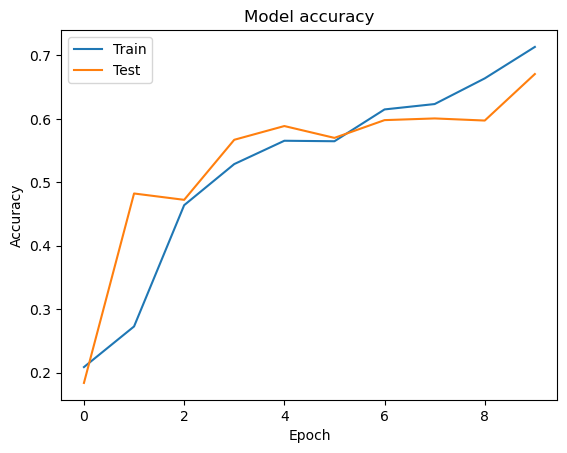

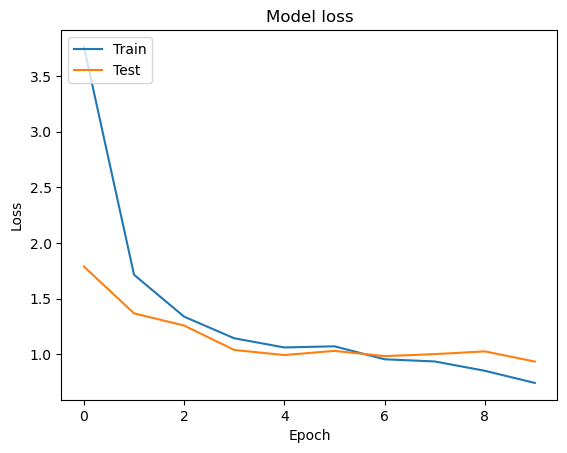

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)

94/94 [==============================] - 13s 134ms/step - loss: 0.9345 - accuracy: 0.6707
Test accuracy: 0.6706666946411133


The final results of the model show that after training the model on the dataset, the loss achieved on the training set is 0.9345 and the accuracy achieved is 0.6707. This means that the model was able to correctly classify the images in the training set with an accuracy of 67.07%. On the testing data, the accuracy achieved was 0.6707 which means that the model was able to correctly classify the images in the testing set with an accuracy of 67.07%. This accuracy can be improved by increasing the complexity of the model, training it for more epochs or by using other techniques such as data augmentation.